In [1]:
!pip install matplotlib
!pip install contractions

import numpy as np
import pandas as pd

import re
import string # for text cleaning
import contractions # for expanding short form words
from tqdm import tqdm
tqdm.pandas(desc="Progress Bar")

import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 10.4 MB/s eta 0:00:00


In [2]:
df_x = pd.read_csv('./pdf1.csv')
df_x.head()

,Skills,Education,ID,Category
0,Accounting; General Accounting; Accounts Payab...,Northern Maine Community College 1994 Associat...,10554236,ACCOUNTANT
1,"accounting, accounts payable, Accounts Receiva...","Bachelor of Science : Accounting , May 2010 Un...",10674770,ACCOUNTANT
2,"accounts payables, accounts receivables, Accou...",Computer Applications Specialist Certificate P...,11163645,ACCOUNTANT
3,"accounting, balance sheet, budgets, client, cl...","EMORY UNIVERSITY, Goizueta Business School 5 2...",11759079,ACCOUNTANT
4,Aderant/CMS Financial reporting,Bachelor of Business Administration : Accounti...,12065211,ACCOUNTANT


# Performing EDA


In [3]:
df_x.isna().sum()

Skills       105
Education    566
ID             0
Category       0
dtype: int64

In [4]:

df_1 = df_x[~(df_x['Skills'].isna() & df_x['Education'].isna())].reset_index(drop=True)
df_1.head()

,Skills,Education,ID,Category
0,Accounting; General Accounting; Accounts Payab...,Northern Maine Community College 1994 Associat...,10554236,ACCOUNTANT
1,"accounting, accounts payable, Accounts Receiva...","Bachelor of Science : Accounting , May 2010 Un...",10674770,ACCOUNTANT
2,"accounts payables, accounts receivables, Accou...",Computer Applications Specialist Certificate P...,11163645,ACCOUNTANT
3,"accounting, balance sheet, budgets, client, cl...","EMORY UNIVERSITY, Goizueta Business School 5 2...",11759079,ACCOUNTANT
4,Aderant/CMS Financial reporting,Bachelor of Business Administration : Accounti...,12065211,ACCOUNTANT


In [5]:
df_1.isna().sum()

Skills       105
Education    566
ID             0
Category       0
dtype: int64

In [6]:
df_1[df_1.Skills.isna()]

,Skills,Education,ID,Category
7,NaN,"Bachelor of Science , Accounting Strayer Unive...",12442909,ACCOUNTANT
23,NaN,University of Phoenix Masters of Business Admi...,15363277,ACCOUNTANT
46,NaN,"Masters , Accounting University of Florida ï¼​...",21794875,ACCOUNTANT
60,NaN,"BBA : Business Administration/Accounting , 200...",24703009,ACCOUNTANT
76,NaN,High School Diploma : Business Management/Acco...,27637576,ACCOUNTANT
...,...,...,...,...
2307,NaN,Medical Transcription 2013 At-Home-Professions...,28198029,SALES
2378,NaN,Plans.\nApplied progressive teaching principle...,17481570,TEACHER
2408,NaN,"Ph.D. : Philosophy in Education , 2019\nNorthc...",27126818,TEACHER
2423,NaN,"12/2009\nRobert Morris University City , State...",31552617,TEACHER


In [7]:
df_1[df_1.Education.isna()]

,Skills,Education,ID,Category
11,Budget forecasting expertise General ledger ac...,NaN,13130984,ACCOUNTANT
13,Full Accounting cycle Auditing,NaN,13491889,ACCOUNTANT
20,"account reconciliations, Accounting, accruals,...",NaN,14491649,ACCOUNTANT
29,"Accounting, billing, Change Management, contra...",NaN,17407184,ACCOUNTANT
31,Analytical reasoning Effective time management,NaN,18132924,ACCOUNTANT
...,...,...,...,...
2433,"Anatomy, Arts, EMR software, front office, inj...",NaN,37402097,TEACHER
2437,Behavior modeling Troubleshooting,NaN,45987048,TEACHER
2444,"Computer literate, drivers, listening, natural...",NaN,58708773,TEACHER
2449,â€¢ Well versed with the standards of hygiene ...,NaN,69005326,TEACHER


In [8]:
df_1.Category.value_counts()

BUSINESS-DEVELOPMENT      119
ACCOUNTANT                118
FINANCE                   118
INFORMATION-TECHNOLOGY    117
ADVOCATE                  117
AVIATION                  117
ENGINEERING               115
CHEF                      115
CONSULTANT                115
BANKING                   115
HEALTHCARE                114
SALES                     114
FITNESS                   113
CONSTRUCTION              111
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  104
ARTS                      102
TEACHER                   102
DIGITAL-MEDIA              96
APPAREL                    96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: Category, dtype: int64

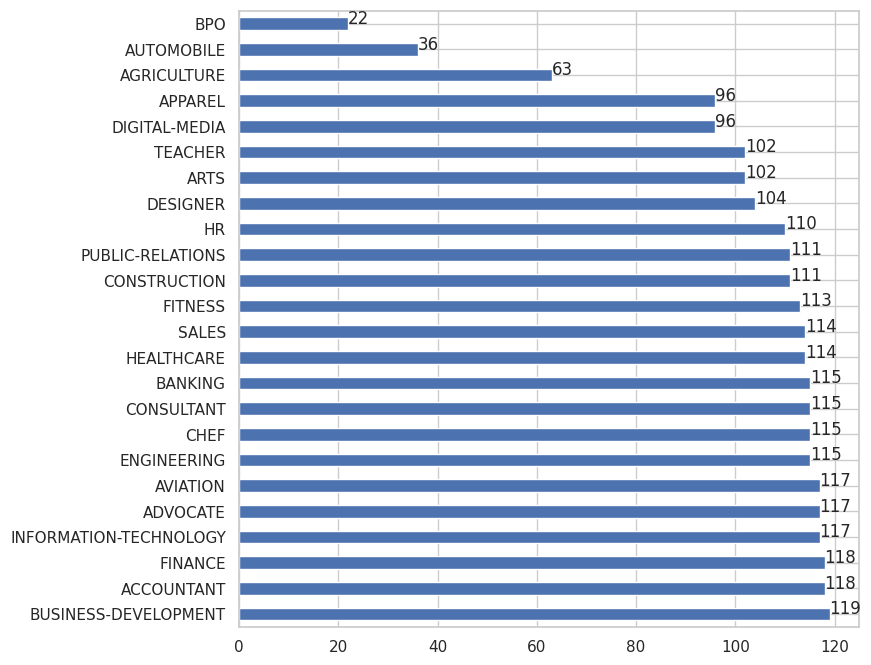

In [9]:

sns.set(style='whitegrid')

plt.figure(figsize=(8,8))

df_1.Category.value_counts().plot(kind='barh')

for index, value in enumerate(df_1.Category.value_counts().values):
    plt.text(value, index, str(value))

plt.show()

# EDA on text data

In [10]:
import re
import pandas as pd
from contractions import fix

def text_cleaning(text: str) -> str:

    if pd.isnull(text):
        return

    # Lowercase everything.
    text = text.lower().strip()

    # Expand all the short-form words.
    text = fix(text)

    # Remove URLs, emails, and phone numbers.
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'\b\d{1,3}[-./]?\d{1,3}[-./]?\d{1,4}\b', '', text)

    # Remove punctuation and other non-alphanumeric characters.
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'[^a-zA-Z]', ' ', text)

    return text.strip()

In [11]:
x = df_1.copy()

# Filling the null values in Skills & Education with Empty String before concatinating them
x = x.fillna(value='')

x['CV'] = x['Skills'] + ' ' + x['Education']
x['CV'] = x['CV'].progress_apply(text_cleaning)

Progress Bar: 100%|██████████| 2460/2460 [00:01<00:00, 1398.41it/s]


In [12]:
x.head()

,Skills,Education,ID,Category,CV
0,Accounting; General Accounting; Accounts Payab...,Northern Maine Community College 1994 Associat...,10554236,ACCOUNTANT,accounting general accounting accounts payable...
1,"accounting, accounts payable, Accounts Receiva...","Bachelor of Science : Accounting , May 2010 Un...",10674770,ACCOUNTANT,accounting accounts payable accounts receivabl...
2,"accounts payables, accounts receivables, Accou...",Computer Applications Specialist Certificate P...,11163645,ACCOUNTANT,accounts payables accounts receivables account...
3,"accounting, balance sheet, budgets, client, cl...","EMORY UNIVERSITY, Goizueta Business School 5 2...",11759079,ACCOUNTANT,accounting balance sheet budgets client client...
4,Aderant/CMS Financial reporting,Bachelor of Business Administration : Accounti...,12065211,ACCOUNTANT,aderantcms financial reporting bachelor of bus...


# Word Length Analysis in Resumes by Category

In [13]:

# Create a function to calculate category-wise CV stats
category_stats = []

for category in x['Category'].unique():
    category_wise_cv = x[x['Category'] == category]['CV']
    stats = category_wise_cv.str.split().str.len().describe(percentiles=[0.05, 0.5, 0.8, 0.9, 0.95])
    category_stats.append({'Category': category, **stats.to_dict()})

ul = pd.DataFrame(category_stats)

# Display the resulting DataFrame
ul

,Category,count,mean,std,min,5%,50%,80%,90%,95%,max
0,ACCOUNTANT,118.0,47.940678,47.329052,1.0,3.85,36.5,72.0,91.3,110.30,342.0
1,ADVOCATE,117.0,50.529915,59.981114,2.0,3.00,37.0,69.8,89.4,136.80,531.0
2,AGRICULTURE,63.0,83.539683,115.009372,2.0,6.20,51.0,110.0,152.4,224.80,784.0
3,APPAREL,96.0,39.770833,29.124227,1.0,3.00,34.0,59.0,73.0,99.75,143.0
4,ARTS,102.0,80.019608,111.256904,1.0,5.05,48.5,103.6,140.8,190.00,736.0
5,AUTOMOBILE,36.0,39.805556,29.706968,0.0,2.50,35.5,64.0,70.5,98.00,115.0
6,AVIATION,117.0,71.743590,112.214400,2.0,3.00,41.0,85.8,147.4,269.60,878.0
7,BANKING,115.0,57.539130,63.401434,3.0,7.00,44.0,76.2,96.2,154.10,511.0
8,BPO,22.0,53.681818,35.492972,2.0,14.05,48.0,70.4,87.9,121.25,155.0
9,BUSINESS-DEVELOPMENT,119.0,49.042017,36.986804,1.0,3.00,40.0,81.2,103.2,121.40,183.0


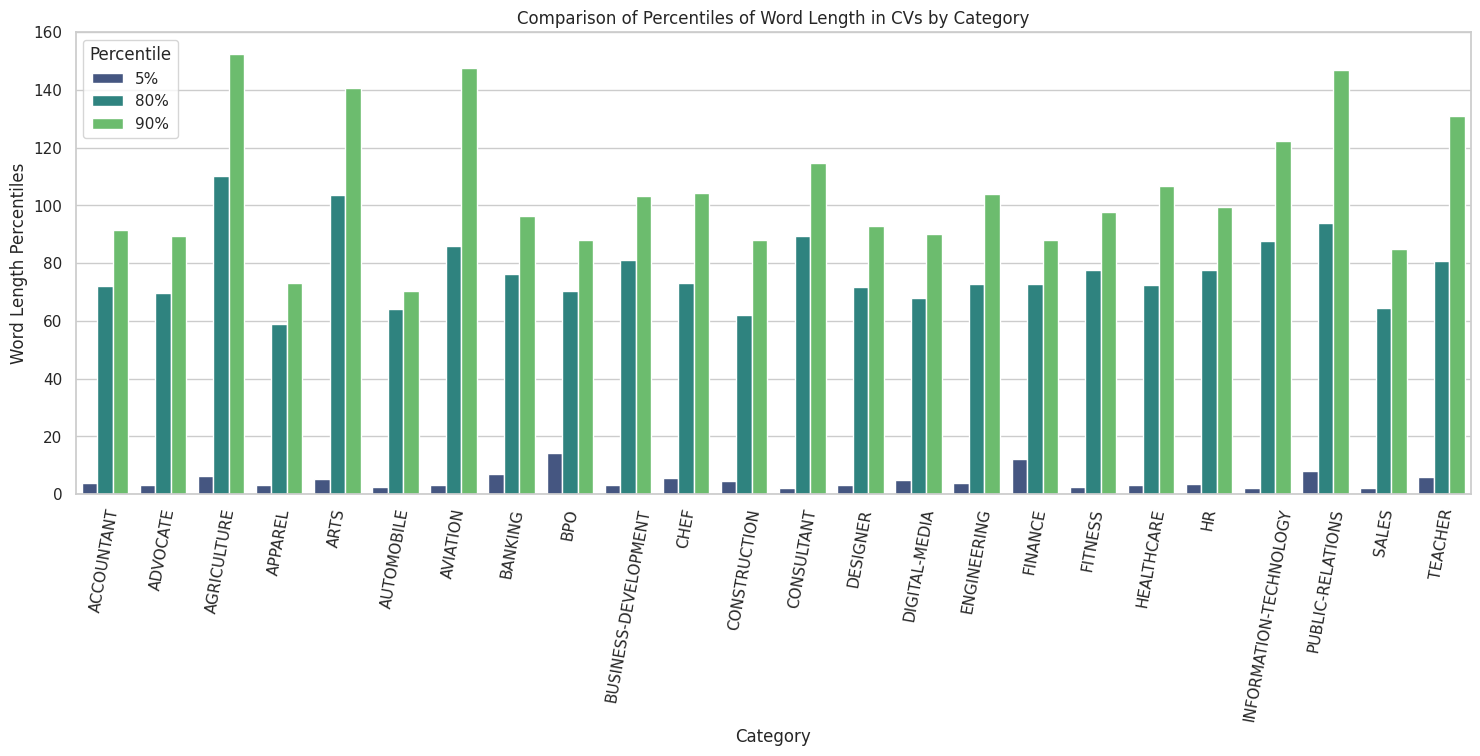

In [14]:
stats_df_long = pd.melt(ul, id_vars=['Category'], value_vars=['5%', '80%', '90%'])

# Create a bar plot to compare percentiles of word length for each category
plt.figure(figsize=(18, 6))
sns.barplot(data=stats_df_long, x='Category', y='value', hue='variable', palette='viridis')

plt.title('Comparison of Percentiles of Word Length in CVs by Category')
plt.xticks(rotation=80)
plt.xlabel('Category')
plt.ylabel('Word Length Percentiles')
plt.legend(title='Percentile')
plt.show();

# EDA on JD Data

In [18]:
!pip install datasets
from datasets import load_dataset

df = load_dataset('jacob-hugging-face/job-descriptions', split="train")
df = pd.DataFrame(df)
df.head()

,company_name,job_description,position_title,description_length,model_response
0,Google,minimum qualifications\nbachelors degree or eq...,Sales Specialist,2727,"{\n ""Core Responsibilities"": ""Responsible fo..."
1,Apple,description\nas an asc you will be highly infl...,Apple Solutions Consultant,828,"{\n ""Core Responsibilities"": ""as an asc you ..."
2,Netflix,its an amazing time to be joining netflix as w...,Licensing Coordinator - Consumer Products,3205,"{\n ""Core Responsibilities"": ""Help drive bus..."
3,Robert Half,description\n\nweb designers looking to expand...,Web Designer,2489,"{\n ""Core Responsibilities"": ""Designing webs..."
4,TrackFive,at trackfive weve got big goals were on a miss...,Web Developer,3167,"{\n ""Core Responsibilities"": ""Build and layo..."


In [19]:
df['job_description'] = df['job_description'].progress_apply(text_cleaning)

Progress Bar: 100%|██████████| 853/853 [00:05<00:00, 160.71it/s]


# Comparing the word lengths in JDs and CVs

In [20]:
df['job_description'].str.split().str.len().describe(percentiles=[0.05,0.5,0.8,0.9,0.95])

count     853.000000
mean      482.649472
std       304.695458
min         3.000000
5%         82.200000
50%       441.000000
80%       702.000000
90%       849.800000
95%      1001.000000
max      3581.000000
Name: job_description, dtype: float64

In [23]:

# Calculate word lengths and describe statistics for job descriptions
jd_len = df['job_description'].str.split().str.len()
jd_cv = jd_len.describe(percentiles=[0.10, 0.4, 0.6, 0.8, 0.9]).drop(['std', 'min', 'max'])

# Calculate word lengths and describe statistics for CVs
resume_len = x['CV'].str.split().str.len()
resume_cv = resume_len.describe(percentiles=[0.1, 0.4, 0.6, 0.8, 0.9]).drop(['std', 'min', 'max'])

# Create a separate DataFrame for each dataset
jd_df_stats = pd.DataFrame({
    'Type': 'Job Descriptions',
    'Statistic': jd_cv.index,
    'Value': jd_cv.values
})

resume_df_stats = pd.DataFrame({
    'Type': 'CVs',
    'Statistic': resume_cv.index,
    'Value': resume_cv.values
})

# Concatenate the DataFrames for plotting
comparison_df = pd.concat([jd_df_stats, resume_df_stats], ignore_index=True)

# Display the resulting DataFrame
comparison_df.head()

,Type,Statistic,Value
0,Job Descriptions,count,853.000000
1,Job Descriptions,mean,482.649472
2,Job Descriptions,10%,142.200000
3,Job Descriptions,40%,374.000000
4,Job Descriptions,50%,441.000000


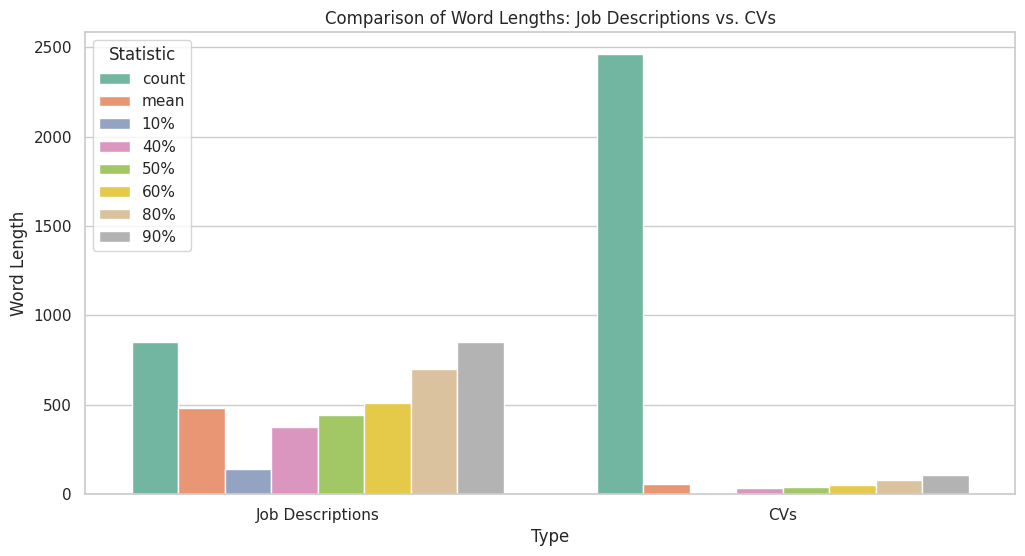

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(data=comparison_df, x='Type', y='Value', hue='Statistic', palette='Set2')


plt.title('Comparison of Word Lengths: Job Descriptions vs. CVs')
plt.xlabel('Type')
plt.ylabel('Word Length')
plt.legend(title='Statistic', loc='upper left')
plt.xticks(rotation=0)
plt.show();